## Bike Sharing Demand Trends

### Preprocessing

Clean the data first so that we may plot features against each other and see any possible trends.

In [2]:
import pandas as pd

day = pd.read_csv("day.csv")
day.head()

instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1        0        6           0   
1        2  2011-01-02       1   0     1        0        0           0   
2        3  2011-01-03       1   0     1        0        1           1   
3        4  2011-01-04       1   0     1        0        2           1   
4        5  2011-01-05       1   0     1        0        3           1   

   weathersit      temp     atemp       hum  windspeed  casual  registered  \
0           2  0.344167  0.363625  0.805833   0.160446     331         654   
1           2  0.363478  0.353739  0.696087   0.248539     131         670   
2           1  0.196364  0.189405  0.437273   0.248309     120        1229   
3           1  0.200000  0.212122  0.590435   0.160296     108        1454   
4           1  0.226957  0.229270  0.436957   0.186900      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600

In [3]:
day.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [4]:
day.dtypes

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

In [5]:
day['dteday'] = day['dteday'].astype('category').cat.codes
day.head()

instant  dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1       0       1   0     1        0        6           0   
1        2       1       1   0     1        0        0           0   
2        3       2       1   0     1        0        1           1   
3        4       3       1   0     1        0        2           1   
4        5       4       1   0     1        0        3           1   

   weathersit      temp     atemp       hum  windspeed  casual  registered  \
0           2  0.344167  0.363625  0.805833   0.160446     331         654   
1           2  0.363478  0.353739  0.696087   0.248539     131         670   
2           1  0.196364  0.189405  0.437273   0.248309     120        1229   
3           1  0.200000  0.212122  0.590435   0.160296     108        1454   
4           1  0.226957  0.229270  0.436957   0.186900      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600

### Hypothesis Generation

Now lets conduct hypothesis generation. The granularity of the dataset is days rather than hours as previously looked at.

1) The average counts per day will vary season to season with Summer being the most popular. This correlates nicely with other features attributed to the weather such as temperature. Generally, we would expect the better the weather the more rentals we have. 

2) We would expect those people to hire a bike on a working day to more likely be registered riders than casual riders as they would more likely rely on renting a bike to get them to work every day. The converese is not necessarily true for the weekends, perhaps we'd see an even split, perhaps not.

3) Holidays (such as bank holidays) you would expect to be anomolous, particularly in the warmer months. 

4) This dataset covers a couple of years - we would naturally expect an increase from one year to the next based simply upon increased familiarity with the brand. 

5) The list could go on and on...

### Understanding the Dataset

Let's explore the dataset...

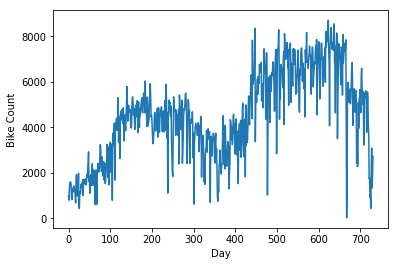

In [8]:
import matplotlib.pyplot as plt

plt.plot(day["dteday"],day["cnt"])
plt.xlabel("Day")
plt.ylabel("Bike Count")
plt.show()

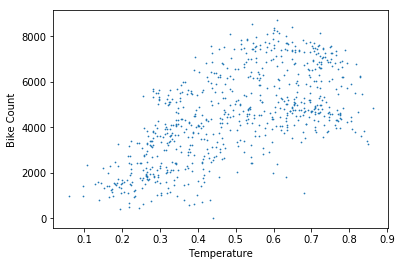

In [9]:
plt.scatter(day["temp"],day["cnt"],s=0.5)
plt.xlabel("Temperature")
plt.ylabel("Bike Count")
plt.show()

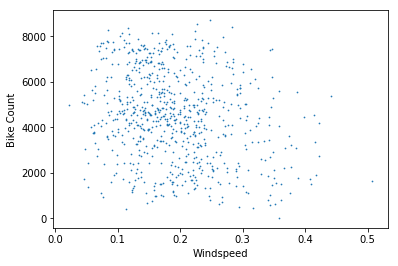

In [10]:
plt.scatter(day["windspeed"],day["cnt"],s=0.5)
plt.xlabel("Windspeed")
plt.ylabel("Bike Count")
plt.show()

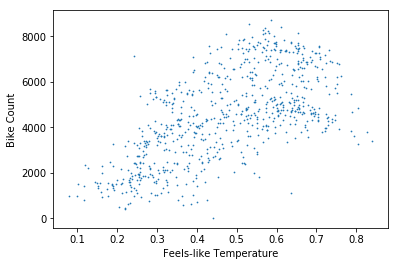

In [11]:
plt.scatter(day["atemp"],day["cnt"],s=0.5)
plt.xlabel("Feels-like Temperature")
plt.ylabel("Bike Count")
plt.show()

In [12]:
print(day.groupby("season")["cnt"].mean())
print(day.groupby("mnth")["cnt"].mean())
print(day.groupby("workingday")["cnt"].mean())
print(day.groupby("weekday")["cnt"].mean())
print(day.groupby("weathersit")["cnt"].mean())

season
1    2604.132597
2    4992.331522
3    5644.303191
4    4728.162921
Name: cnt, dtype: float64
mnth
1     2176.338710
2     2655.298246
3     3692.258065
4     4484.900000
5     5349.774194
6     5772.366667
7     5563.677419
8     5664.419355
9     5766.516667
10    5199.225806
11    4247.183333
12    3403.806452
Name: cnt, dtype: float64
workingday
0    4330.168831
1    4584.820000
Name: cnt, dtype: float64
weekday
0    4228.828571
1    4338.123810
2    4510.663462
3    4548.538462
4    4667.259615
5    4690.288462
6    4550.542857
Name: cnt, dtype: float64
weathersit
1    4876.786177
2    4035.862348
3    1803.285714
Name: cnt, dtype: float64


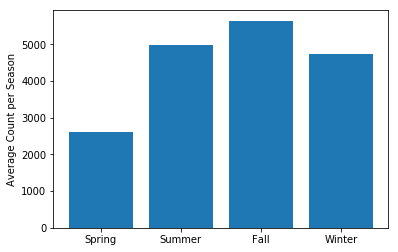

In [13]:
plt.bar(("Spring","Summer","Fall","Winter"),day.groupby("season")["cnt"].mean())
plt.ylabel("Average Count per Season")
plt.show()

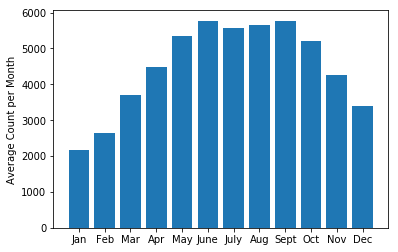

In [14]:
plt.bar(("Jan","Feb","Mar","Apr","May","June","July","Aug","Sept","Oct","Nov","Dec"),day.groupby("mnth")["cnt"].mean())
plt.ylabel("Average Count per Month")
plt.show()

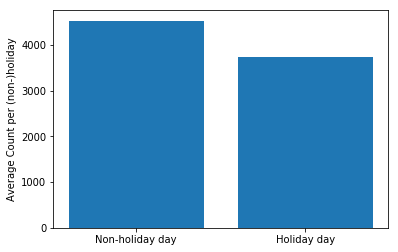

In [15]:
plt.bar(("Non-holiday day","Holiday day"),day.groupby("holiday")["cnt"].mean())
plt.ylabel("Average Count per (non-)holiday")
plt.show()

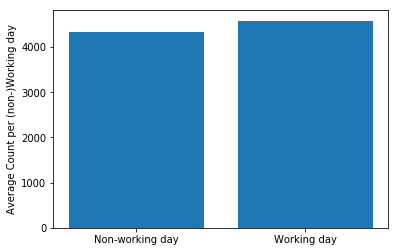

In [16]:
plt.bar(("Non-working day","Working day"),day.groupby("workingday")["cnt"].mean())
plt.ylabel("Average Count per (non-)Working day")
plt.show()

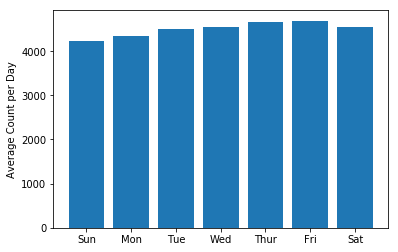

In [17]:
plt.bar(("Sun","Mon","Tue","Wed","Thur","Fri","Sat"),day.groupby("weekday")["cnt"].mean())
plt.ylabel("Average Count per Day")
plt.show()

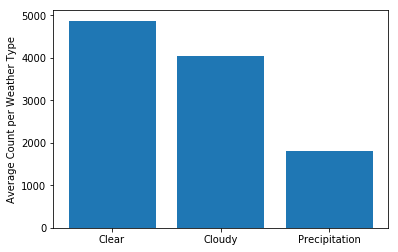

In [18]:
day["weathersit"].value_counts()

plt.bar(("Clear","Cloudy","Precipitation"),day.groupby("weathersit")["cnt"].mean())
plt.ylabel("Average Count per Weather Type")
plt.show()

0 means non-working day
1 means working day

In [19]:
print(day.groupby("workingday")["casual"].mean())
print(day.groupby("workingday")["registered"].mean())
print(day.groupby("weekday")["casual"].mean())
print(day.groupby("weekday")["registered"].mean())

workingday
0    1371.134199
1     606.570000
Name: casual, dtype: float64
workingday
0    2959.034632
1    3978.250000
Name: registered, dtype: float64
weekday
0    1338.295238
1     674.133333
2     556.182692
3     551.144231
4     590.961538
5     752.288462
6    1465.257143
Name: casual, dtype: float64
weekday
0    2890.533333
1    3663.990476
2    3954.480769
3    3997.394231
4    4076.298077
5    3938.000000
6    3085.285714
Name: registered, dtype: float64


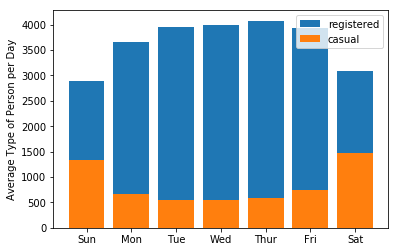

In [20]:
plt.bar(("Sun","Mon","Tue","Wed","Thur","Fri","Sat"),day.groupby("weekday")["registered"].mean(),label="registered")
plt.bar(("Sun","Mon","Tue","Wed","Thur","Fri","Sat"),day.groupby("weekday")["casual"].mean(),label="casual")
plt.legend()
plt.ylabel("Average Type of Person per Day")
plt.show()

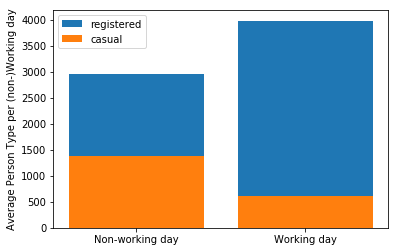

In [21]:
plt.bar(("Non-working day","Working day"),day.groupby("workingday")["registered"].mean(),label="registered")
plt.bar(("Non-working day","Working day"),day.groupby("workingday")["casual"].mean(),label="casual")
plt.ylabel("Average Person Type per (non-)Working day")
plt.legend()
plt.show()

### Identifying Dependent and Independent Variables

In the business context of this investigation the dependent variable is the count of bikes, with casual and registered summing to the overall count. It is clear that registered riders use the bikes much more than casual riders. We might keep all three columns as these values all depend upon the other variables of the table but not on each other (well the first and second constrain the third but the first and third are not linearly dependent).

There are a number of redundant columns such as instant, dteday so can be removed. The rest of the columns may be kept as they are the independent variables.

In [22]:
dropped_dataframe = day.drop(["dteday","instant"],axis=1)
dropped_dataframe.head()

season  yr  mnth  holiday  weekday  workingday  weathersit      temp  \
0       1   0     1        0        6           0           2  0.344167   
1       1   0     1        0        0           0           2  0.363478   
2       1   0     1        0        1           1           1  0.196364   
3       1   0     1        0        2           1           1  0.200000   
4       1   0     1        0        3           1           1  0.226957   

      atemp       hum  windspeed  casual  registered   cnt  
0  0.363625  0.805833   0.160446     331         654   985  
1  0.353739  0.696087   0.248539     131         670   801  
2  0.189405  0.437273   0.248309     120        1229  1349  
3  0.212122  0.590435   0.160296     108        1454  1562  
4  0.229270  0.436957   0.186900      82        1518  1600

### Analysis

We might say from the data exploration stage that days of the week doesn't seem to be a good indicator for the number of bikes rented and similarly whether it is a working or non-working day. Of course these days affect the split of registered vs casual users but the overall business goal would be to be able to predict the overall count of hired bikes. These features we might therefore say would be redundant.

In [23]:
dropped_further_dataframe = dropped_dataframe.drop(['weekday','workingday'],axis=1)
dropped_further_dataframe.head()

season  yr  mnth  holiday  weathersit      temp     atemp       hum  \
0       1   0     1        0           2  0.344167  0.363625  0.805833   
1       1   0     1        0           2  0.363478  0.353739  0.696087   
2       1   0     1        0           1  0.196364  0.189405  0.437273   
3       1   0     1        0           1  0.200000  0.212122  0.590435   
4       1   0     1        0           1  0.226957  0.229270  0.436957   

   windspeed  casual  registered   cnt  
0   0.160446     331         654   985  
1   0.248539     131         670   801  
2   0.248309     120        1229  1349  
3   0.160296     108        1454  1562  
4   0.186900      82        1518  1600

### Preprocessing of features

In [24]:
# First we can normalize our features.

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Sort data

X_train = dropped_further_dataframe.drop(['casual','registered','cnt'],axis=1)
y_train = day['cnt']

X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.4, random_state=0)

X_train.head()

season  yr  mnth  holiday  weathersit      temp     atemp       hum  \
107       2   0     4        0           1  0.512500  0.503146  0.542500   
133       2   0     5        0           2  0.520833  0.500629  0.922500   
418       1   1     2        0           1  0.454167  0.444446  0.554583   
223       3   0     8        0           1  0.708333  0.654042  0.415000   
549       3   1     7        0           1  0.780833  0.702650  0.492083   

     windspeed  
107   0.163567  
133   0.134950  
418   0.190913  
223   0.125621  
549   0.126237

### Feature Engineering

In [25]:
from sklearn.ensemble import RandomForestClassifier

random_forest_classifier = RandomForestClassifier(n_estimators=100, max_depth=10,random_state=0, n_jobs=-1)
random_forest_classifier.fit(X_train, y_train)

# Print the name and gini importance of each feature

feature_labels = ['season','yr','mnth','holiday','weathersit','temp','atemp','hum','windspeed']
for feature in zip(feature_labels, random_forest_classifier.feature_importances_):
    print(feature)

/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


('season', 0.03519129108203697)
('yr', 0.03813870633374681)
('mnth', 0.08511750644076352)
('holiday', 0.016223058085765713)
('weathersit', 0.03565172816053678)
('temp', 0.19282718993059447)
('atemp', 0.2013133390685038)
('hum', 0.20270423526003245)
('windspeed', 0.19283294563801948)


We'll therefore drop any feature with a Gini importance of less around 0.2. This leaves us with:

In [26]:
dropped_even_further_dataframe = dropped_further_dataframe.drop(["season","yr","mnth","holiday","weathersit","casual","registered","cnt"],axis=1)
x_train = dropped_even_further_dataframe
y_train = day["cnt"]
x_train, x_test, y_train, y_test = train_test_split(x_train, y_train, test_size=0.4, random_state=0)

x_train.head()

temp     atemp       hum  windspeed
107  0.512500  0.503146  0.542500   0.163567
133  0.520833  0.500629  0.922500   0.134950
418  0.454167  0.444446  0.554583   0.190913
223  0.708333  0.654042  0.415000   0.125621
549  0.780833  0.702650  0.492083   0.126237

### Data Modelling

In [27]:
import keras
from keras.models import Sequential
from keras.layers import Dense

model_best = Sequential()
model_best.add(Dense(1024,input_dim=4, activation='relu'))
model_best.add(Dense(512, activation='relu'))
model_best.add(Dense(256, activation='relu'))
model_best.add(Dense(128,activation='relu'))
model_best.add(Dense(64,activation='relu'))
model_best.add(Dense(1,activation='linear'))
model_best.compile(loss="mean_absolute_error",optimizer="adam",metrics=["mean_absolute_error"])
model_best.summary()

Using TensorFlow backend.
/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1024)              5120      
_________________________________________________________________
dense_2 (Dense)              (None, 512)               524800    
_________________________________________________________________
dense_3 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_4 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_5 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 65        
Total params: 702,465
Trainable params: 702,465
Non-trainable params: 

In [28]:
from keras.callbacks import ModelCheckpoint

checkpoint_name = 'weights_best.hdf5' 
checkpoint = ModelCheckpoint(checkpoint_name, monitor='val_loss', verbose = 0, save_best_only = True, mode ='auto')
callbacks_list = [checkpoint]

In [29]:
print(x_train[:400])

         temp     atemp       hum  windspeed
107  0.512500  0.503146  0.542500   0.163567
133  0.520833  0.500629  0.922500   0.134950
418  0.454167  0.444446  0.554583   0.190913
223  0.708333  0.654042  0.415000   0.125621
549  0.780833  0.702650  0.492083   0.126237
102  0.412500  0.417283  0.819167   0.250617
108  0.505833  0.489258  0.665833   0.157971
213  0.783333  0.707071  0.491250   0.205850
481  0.498333  0.483583  0.756667   0.176625
408  0.222500  0.227913  0.411250   0.167283
246  0.709167  0.665429  0.742083   0.206467
605  0.728333  0.666050  0.620000   0.190925
542  0.630833  0.594704  0.373333   0.347642
125  0.479167  0.474117  0.590000   0.228246
422  0.366667  0.357954  0.490833   0.268033
526  0.726667  0.663517  0.538333   0.133721
385  0.173333  0.174875  0.831250   0.222642
591  0.726667  0.676779  0.686667   0.169158
224  0.685833  0.645858  0.729583   0.211454
26   0.195000  0.219700  0.687500   0.113837
538  0.777500  0.724121  0.573750   0.182842
514  0.722

In [60]:
model_best.fit(x_train.values, y_train.values, epochs=5000, batch_size=32, validation_split = 0.2, callbacks=callbacks_list,verbose=0)

In [53]:
weights_file = 'weights_best.hdf5'
model_best.load_weights(weights_file)
model_best.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error'])

In [54]:
predictions_NN_best = model_best.predict(x_test.values)

In [55]:
from sklearn.metrics import mean_absolute_error

MAE_Best = mean_absolute_error(y_test.values, predictions_NN_best)
print('Neural Network validation MAE = ',MAE_Best)

Neural Network validation MAE =  1125.3701290872723


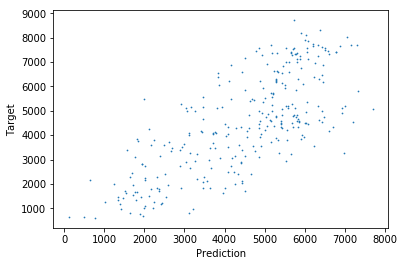

In [56]:
import matplotlib.pyplot as plt

plt.scatter(predictions_NN_best,y_test.values,s=0.5)
plt.xlabel("Prediction")
plt.ylabel("Target")
plt.show()

Linear Regression validation MAE =  1235.116098913553


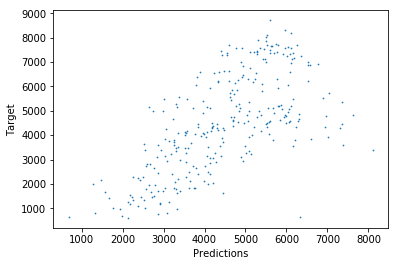

In [74]:
## Let's just try simple linear regression as reference

from sklearn.cross_validation import cross_val_score, cross_val_predict
from sklearn import metrics
from sklearn import linear_model

lm = linear_model.LinearRegression()
model_complete_diff = lm.fit(x_train.values,y_train.values)

scores = cross_val_score(model_complete_diff,x_train.values,y_train.values,cv=5)
predictions = cross_val_predict(model_complete_diff,x_test.values,y_test.values,cv=5)

mae_best_lr = mean_absolute_error(y_test.values, predictions)
print('Linear Regression validation MAE = ',mae_best_lr)

plt.scatter(predictions,y_test.values,s=0.5)
plt.xlabel("Predictions")
plt.ylabel("Target")
plt.show()

Just not enough data to really train a proper model...there are obviously better ways to perform this, such as the following:

a) Develop new features in the feature engineering step.
b) Think more carefully about feature selection.
c) Use different models or tune existing ones.

https://medium.com/@viveksrinivasan/how-to-finish-top-10-percentile-in-bike-sharing-demand-competition-in-kaggle-part-1-c816ea9c51e1 provides a great account of the steps that he took.

Furthermore, a number of factors need to be considered in the feature engineering step - surely the season affects hourly bike rentals due to simply the number of hours of the day with light. Maybe some kind of feature that combines season and time of day, such as a daylight binary switch, would be a good feature to introduce. Furthermore, holidays are so infrequent so we cannot expect the weather on these holidays to follow the same distribution as the overall weather. Thus since we think weather and holidays are so important we run in to a problem with trying to make inferences from not enough data. Maybe on all of the most recent holidays (the dataset only spans 2 years) we've been lucky and the weather has 